In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


Checkpoint 100, Accuracy: 0.7839506172839507, Loss: 0.6365567666512949
Checkpoint 200, Accuracy: 0.7839506172839507, Loss: 0.6365567666512949
Checkpoint 300, Accuracy: 0.7839506172839507, Loss: 0.6365567666512949
Checkpoint 400, Accuracy: 0.7839506172839507, Loss: 0.6365567666512949
Checkpoint 500, Accuracy: 0.7839506172839507, Loss: 0.6365567666512949


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.899739   0.04100088 0.05926005]
[1. 0. 0.] <-> [0.9586839  0.01503677 0.02627929]
[1. 0. 0.] <-> [6.312304e-01 3.789568e-04 3.683906e-01]
[1. 0. 0.] <-> [7.1123755e-01 3.4924585e-04 2.8841323e-01]
[1. 0. 0.] <-> [8.3853060e-01 3.9574524e-04 1.6107370e-01]
[1. 0. 0.] <-> [0.69746006 0.00111058 0.3014294 ]
[1. 0. 0.] <-> [0.9543703  0.00343013 0.04219944]
[1. 0. 0.] <-> [0.4506646  0.00069599 0.5486394 ]
[0. 0. 1.] <-> [7.7028549e-01 9.7713761e-05 2.2961682e-01]
[1. 0. 0.] <-> [0.763605   0.0367979  0.19959708]
[1. 0. 0.] <-> [0.9608631  0.01042565 0.02871125]
[1. 0. 0.] <-> [1.4355387e-01 5.7318754e-04 8.5587299e-01]
[1. 0. 0.] <-> [7.1972513e-01 1.5876176e-04 2.8011614e-01]
[1. 0. 0.] <-> [0.68791044 0.01631206 0.2957775 ]
[0. 1. 0.] <-> [0.5146203  0.28412676 0.20125295]
[1. 0. 0.] <-> [0.86020434 0.00665014 0.13314554]
[1. 0. 0.] <-> [6.704743e-01 2.762813e-04 3.292494e-01]
[0. 0. 1.] <-> [5.6207895e-01 2.2842071e-04 4.3769261e-01]
[1. 0. 0.] <-> [0.74208254 0.01157

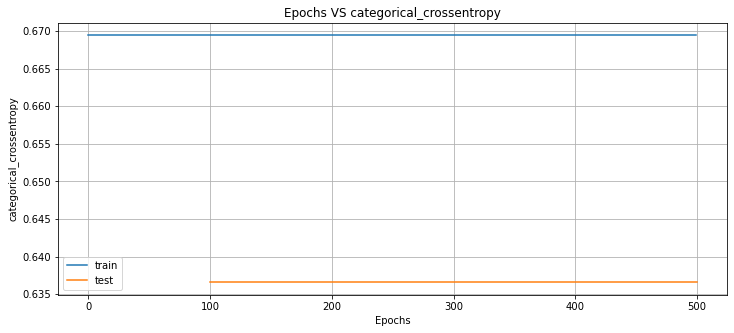

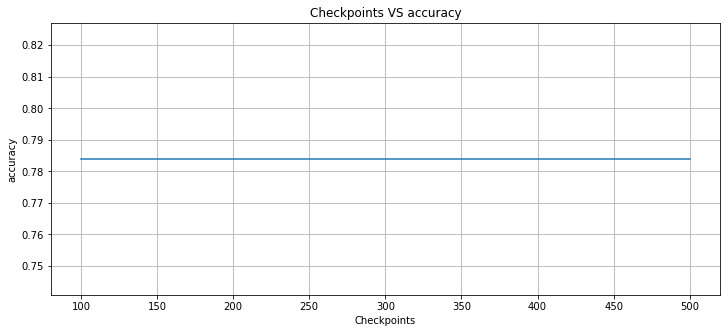

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.7839506172839507, 'mean_square_error': 0.38713146402248017, 'categorical_crossentropy': 0.6365567666512949, 'essential_metrics': {0: {'tp_hit': 67, 'fp_hit': 24, 'tn_hit': 8, 'fn_hit': 9}, 1: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 11}, 2: {'tp_hit': 0, 'fp_hit': 11, 'tn_hit': 82, 'fn_hit': 15}}, 'checkpoint': 100} 


{'accuracy': 0.7839506172839507, 'mean_square_error': 0.38713146402248017, 'categorical_crossentropy': 0.6365567666512949, 'essential_metrics': {0: {'tp_hit': 67, 'fp_hit': 24, 'tn_hit': 8, 'fn_hit': 9}, 1: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 11}, 2: {'tp_hit': 0, 'fp_hit': 11, 'tn_hit': 82, 'fn_hit': 15}}, 'checkpoint': 200} 


{'accuracy': 0.7839506172839507, 'mean_square_error': 0.38713146402248017, 'categorical_crossentropy': 0.6365567666512949, 'essential_metrics': {0: {'tp_hit': 67, 'fp_hit': 24, 'tn_hit': 8, 'fn_hit': 9}, 1: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 11}, 2: {'tp_hit': 0, 'fp_hit': 11, 'tn_hit': 82, 

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[-2.43569132  2.08778944  0.74022635  0.0976063  -2.1211176 ]
 bias: -0.04863124189182155

Neuron 1: weights:
[-2.57037486  1.66468507  0.25329818 -1.54556427  2.62661995]
 bias: -0.6491812202085034

Neuron 2: weights:
[ 2.17765258  2.76567319  0.79988682 -2.54118965 -0.83207419]
 bias: 0.8176193415382382

Neuron 3: weights:
[-1.79875344 -1.56317079 -2.45078406  2.49572905  2.53590849]
 bias: 2.239767699966934

$
Layer 2
Neuron 0: weights:
[-2.79186026  0.34643023  0.92015765  2.1207424 ]
 bias: 2.622150559699026

Neuron 1: weights:
[-0.19230326  1.52620088  2.72894362 -2.00676034]
 bias: -2.2384058322186093

Neuron 2: weights:
[-0.31197072  1.29283538 -1.1454507   2.765002  ]
 bias: 0.7814668341114022

$

